In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import numpy as np
from scipy.stats import sem

## Read in dataframe containing the fusion efficiency data

In [2]:
df_path = input("input path to .xlsx file containing fusion efficiency data: ")

df = pd.read_excel(df_path)

input path to .xlsx file containing fusion efficiency data: /Users/steinar/Documents/Data/4 - cell vs. endosomal membrane in fusion/2 - fusion with PMV/4 - liposomes and PMV content mixing by FT Calcein incorporation/reanalysed data with trace type classification (P4E25T1 and P4E25T2)/leakage efficiency no virus/compiled leakage efficiency.xlsx


In [3]:
def two_sample_t_test(df):
    # Check if there are exactly two groups
    groups = df[df.columns[0]].unique()
    if len(groups) != 2:
        raise ValueError("The dataframe must have exactly two groups.")

    # Check if each group has at least two samples
    for group in groups:
        if df[df[df.columns[0]] == group].shape[0] < 2:
            raise ValueError(f"At least two samples are required for each group. Group '{group}' does not have enough samples.")

    # Check for normality assumption using Shapiro-Wilk test
    for group in groups:
        data = df[df[df.columns[0]] == group][df.columns[-1]]
        _, p_value = stats.shapiro(data)
        if p_value < 0.05:
            print(f"Warning: The data for group '{group}' may not be normally distributed (Shapiro-Wilk p-value: {p_value:.4f}).")

    # Perform the two-sample t-test
    group1 = df[df[df.columns[0]] == groups[0]][df.columns[-1]]
    group2 = df[df[df.columns[0]] == groups[1]][df.columns[-1]]

    _, p_value = stats.ttest_ind(group1, group2)

    print("\nTwo-Sample T-Test Results:")
    print(f"P-Value: {p_value:.4f}")

    if p_value < 0.05:
        print("The difference between the groups is statistically significant (p-value < 0.05).")
    else:
        print("There is no significant difference between the groups (p-value >= 0.05).")

# Example usage:
# Assuming your DataFrame is named 'df' with the desired structure
# (groups in the first column, values in the last column)
# two_sample_t_test(df)


In [4]:
two_sample_t_test(df)


Two-Sample T-Test Results:
P-Value: 0.1882
There is no significant difference between the groups (p-value >= 0.05).


In [5]:
import pandas as pd
from scipy import stats

def wilcoxon_rank_sum_test(df):
    # Check if there are exactly two groups
    groups = df[df.columns[0]].unique()
    if len(groups) != 2:
        raise ValueError("The dataframe must have exactly two groups.")

    # Check if each group has at least two samples
    for group in groups:
        if df[df[df.columns[0]] == group].shape[0] < 2:
            raise ValueError(f"At least two samples are required for each group. Group '{group}' does not have enough samples.")

    # Perform the Wilcoxon Rank-Sum test
    group1 = df[df[df.columns[0]] == groups[0]][df.columns[-1]]
    group2 = df[df[df.columns[0]] == groups[1]][df.columns[-1]]

    _, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')

    print("\nWilcoxon Rank-Sum Test Results:")
    print(f"P-Value: {p_value:.4f}")

    if p_value < 0.05:
        print("The difference between the groups is statistically significant (p-value < 0.05).")
    else:
        print("There is no significant difference between the groups (p-value >= 0.05).")

In [6]:
wilcoxon_rank_sum_test(df)


Wilcoxon Rank-Sum Test Results:
P-Value: 0.1840
There is no significant difference between the groups (p-value >= 0.05).


## Plot barplot of data and save as .pdf

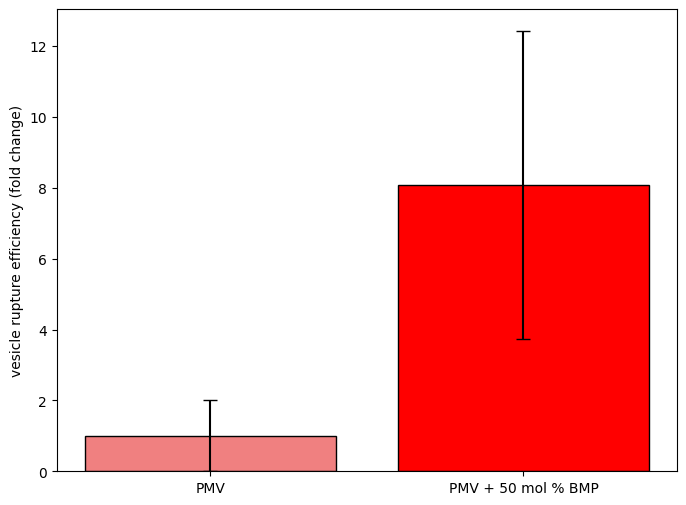

In [14]:
# Calculate mean and standard error for each group
group_means = df.groupby(df.columns[0], sort=False)[df.columns[-1]].mean()
group_sem = df.groupby(df.columns[0], sort=False)[df.columns[-1]].apply(sem)

# Create a barplot with pyplot
groups = group_means.index
means = group_means.values
errors = group_sem.values

# Define a color scheme for each dataset
colors = ['lightcoral', 'red','blue', 'dodgerblue', 'tomato', 'grey', 'grey', 'grey']

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(groups, means, yerr=errors, capsize=5, color=colors, edgecolor='black')

# Customize the plot
for tick in ax.get_xticklabels():
    tick.set_rotation(0)
plt.xlabel('')
plt.ylabel('vesicle rupture efficiency (fold change)')

# Save the figure as a PDF file
folder = '/Users/steinar/Desktop'
filename = '/efficiency plot.pdf'
plt.savefig(folder + filename, format='pdf', bbox_inches = 'tight')

# Show the plot
plt.show()